# 1. Importing Necessary Libraries

In [23]:
import pandas as pd
import numpy as np
import os
import pickle
import joblib
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Load Train and Test Data

In [24]:
X_train_df = pd.read_csv("saved_data/X_train.csv")
X_test_df = pd.read_csv("saved_data/X_test.csv")
y_train_df = pd.read_csv("saved_data/y_train.csv")
y_test_df = pd.read_csv("saved_data/y_test.csv")

#  3. Fit Scaler on X_train and Transform Both Sets

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)


# 4. Save the Scaler for Later Use

In [26]:
os.makedirs("model", exist_ok=True)

with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Scaler saved successfully!")


✅ Scaler saved successfully!


# 5. Build the ANN Model

In [27]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Start building ANN model # First hidden layer
    Dense(32, activation='relu'), # Second hidden layer
    Dense(1)  # Output layer for regression 
])


# 6. Compile the Model

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae']) # Use MSE loss and MAE for evaluation


# 7. Callbacks Setup

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Train model with validation
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)


NameError: name 'EarlyStopping' is not defined

# 8. Train the model

In [21]:
history = model.fit(X_train_scaled, y_train_df, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint], verbose=1)

with open("scaler.pkl", "wb") as f:
    pickle.dump(sc, f)



NameError: name 'early_stopping' is not defined

# 9. Save the Trained Model

In [22]:
model.save("model/ann_model.h5")
print("✅ Model saved successfully!")


✅ Model saved successfully!


C:\Users\DELL\anaconda3\envs\civil\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 10. Plotting Training & Validation Loss

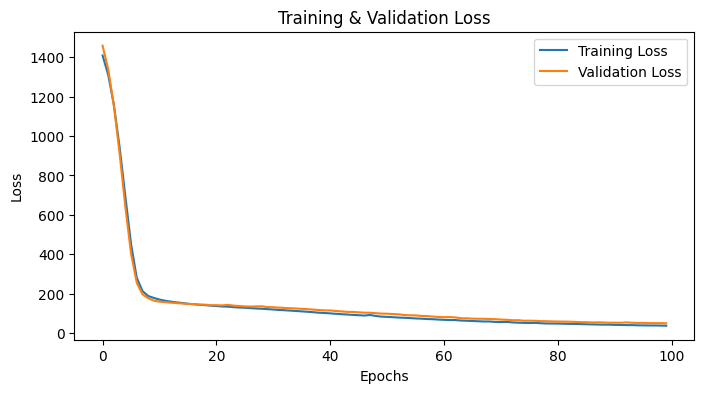

In [52]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 11. Evaluating the Model - Accuracy (R² score for regression)

In [63]:
y_pred = model.predict(X_test_scaled)  # Predict on test data

# Calculate evaluation metrics
mse = mean_squared_error(y_test_df, y_pred)  # Average of squared errors
mae = mean_absolute_error(y_test_df, y_pred)  # Average of absolute errors
r2 = r2_score(y_test_df, y_pred)  # Model performance score

print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


7/7 [==============================] - 0s 2ms/step
MSE: 58.62, MAE: 5.65, R²: 0.80


# 12. Make Predictions on Test Data

In [54]:
y_pred = model.predict(X_test_scaled).flatten()


7/7 [==============================] - 0s 1ms/step


# 13. Confidence Score (Model's prediction accuracy)

In [55]:
# 11. Confidence Score (Model's prediction accuracy)
confidence_score = r2_score(y_test_df, y_pred)
print(f"Confidence Score (R²): {confidence_score:.4f}")


Confidence Score (R²): 0.8035


# 14. Create Confidence Table (Predicted vs True)

In [56]:
confidence_df = pd.DataFrame({
    'Predicted_Value': y_pred,
    'True_Value': y_test_df.squeeze()
})

print("=== Confidence Table ===")
display(confidence_df.head(10))


=== Confidence Table ===


,Predicted_Value,True_Value
0,26.179352,19.009543
1,20.800484,24.290929
2,33.059513,26.322815
3,37.274853,34.569637
4,40.966637,44.133359
5,22.415823,33.003837
6,19.831306,17.275511
7,35.913349,25.422359
8,26.596359,33.729166
9,45.387150,34.397958


# 15. Graphical Presentation of Predictions (Optional)

# 12. Saving the Model

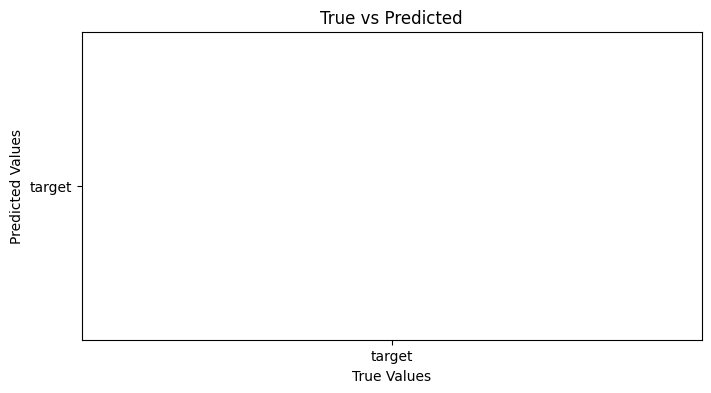

In [58]:
# 13. Graphical Presentation of Predictions (Optional)
plt.figure(figsize=(8, 4))
plt.scatter(y_test_df, y_pred)
plt.plot([min(y_test_df), max(y_test_df)], [min(y_test_df), max(y_test_df)], color='red')  # Ideal line
plt.title('True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [59]:
# 12. Saving the Model
model.save('final_model.h5')
print("Model saved as final_model.h5")


Model saved as final_model.h5


C:\Users\DELL\anaconda3\envs\civil\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
import plotly.graph_objects as go
import numpy as np

# Sample data (replace with your training history)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(train_loss) + 1))

# Create initial figure
fig = go.Figure(
    layout=go.Layout(
        title="Training vs Validation Loss Over Epochs",
        xaxis=dict(title="Epochs", range=[1, len(epochs)]),
        yaxis=dict(title="Loss (MSE)", range=[0, max(max(train_loss), max(val_loss)) * 1.1]),
        updatemenus=[dict(type="buttons",
                          showactive=False,
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, {"frame": {"duration": 300, "redraw": True},
                                                     "fromcurrent": True}])])]
    )
)

# Initial empty traces
fig.add_trace(go.Scatter(x=[], y=[], mode='lines+markers', name='Training Loss'))
fig.add_trace(go.Scatter(x=[], y=[], mode='lines+markers', name='Validation Loss'))

# Frames for animation
frames = []
for i in range(1, len(epochs)+1):
    frames.append(go.Frame(
        data=[
            go.Scatter(x=epochs[:i], y=train_loss[:i]),
            go.Scatter(x=epochs[:i], y=val_loss[:i])
        ]
    ))

fig.frames = frames

# Show interactive animation
fig.show()


NameError: name 'history' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
data = pd.read_csv('preprocessed_data.csv')  # Replace with your actual file name

# Separate features and target
X = data.drop('target_column', axis=1)  # Replace 'target_column' with the actual target name
y = data['target_column']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a second model (Random Forest)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_df, y_train_df)

# Predict on the test set
rf_preds = rf_model.predict(X_test_df)

# Evaluate both models
existing_preds = existing_model.predict(X_test)  # Replace with your model's predict method
existing_rmse = mean_squared_error(y_test, existing_preds, squared=False)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)

existing_r2 = r2_score(y_test, existing_preds)
rf_r2 = r2_score(y_test, rf_preds)

# Print comparison
print("📊 Model Comparison:")
print(f"Existing Model - RMSE: {existing_rmse:.4f}, R2 Score: {existing_r2:.4f}")
print(f"Random Forest  - RMSE: {rf_rmse:.4f}, R2 Score: {rf_r2:.4f}")


NameError: name 'X_train_df' is not defined